In [3]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
!pip install sweetviz
import sweetviz as sv
import webbrowser
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics
from numpy import mat
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)

In [4]:
pd.set_option('display.max_columns',100)
df = pd.read_csv('/Users/wenzhao/Desktop/ds/data_credit.csv', dtype = 'str')
df.head()

,uid,RES,TOTAL_PRICE,DOWN_PAY,MTH_REPAY_AMT,LOAN_HOUR,CUST_OPEN_ORG,IS_INSUUANCE,SEX,AGE,REG_PROV,REG_CITY,IS_REG_LIVE,LIVE_BUILD_TYPE,LIVE_TIME_SPAN,LIVE_PROV,LIVE_CITY,MOBILE_TIME_SPAN,MTH_TEL_BILL,IS_REAL_NAME,MAR_STATUS,IS_REG_ADD,INCOME,EDUCATION,UNIT_TYPE,WORK_TIME_SPAN,UNIT_PROV,UNIT_CITY,UNIT_SCALE,STR_PROV,STR_CITY,FILE_TYPE,CUST_TYPE,FAM_REL_CODE,CONTACT_REL_CODE,WORK_DEPT_CODE,GOODS_TYPE_CODE,G01001,G01002,G01003,G01004,G01005,G01007,G01008,G02001,G02002,G02003,G02004,G02005,G02006,G02007,G02010,G02015,G02016,G02017,G03002,G03005,G03012,G04001,G04002,G04003,G04005,G04008,G04013,G04016,MAR_LEVEL,STR_LEVEL,IS_GRAY,IS_WHITE,TDJG,FXFS,STR_RISK_LEVEL,SA_LEVEL,IS_NUM_REPEAT,PRO_NAME,NATION,contno,IS_TQJQ,yqcszb,maxodd,r2yq,maxr2odd,wb_cnt
0,ee19031e4c0e00e3861a,0,1200,100,122,15,102,000002,019002,35,110000,111700,022001,003001,4,110000,111700,3,6001,000001,007002,1,3,026002,008005,4,110000,111700,88002,110000,111700,100,017001,FAM0003,CON0001,销售部,GTP0002,090001,090001,090001,090001,090001,090001,090001,090002,090001,090002,090001,090001,090001,090002,090001,090001,090001,090001,090001,090001,090001,090002,090001,090001,090001,090001,090001,090001,C,1,000002,000002,Accept,5,1,1,N,30003,90510221701,5,否,0.25,1,0,0,4
1,fd925aabec5efe4d9168,0,3999,1000,379,16,102,000002,019001,27,130000,130900,022001,003001,4,130000,130900,4,6001,000001,007002,1,4,026010,008005,4,130000,130900,88007,130000,130900,101,017001,FAM0003,CON0002,操作部,GTP0006,090001,090001,090001,090001,090001,090001,090002,090002,090002,090002,090002,090001,090001,090001,090001,090001,090001,090001,MISSING,MISSING,090003,090002,090001,090001,090001,090001,090001,090001,C,2,000002,000002,Accept,0,1,0,N,40002,90510221730,5,否,0,0,0,0,3
2,8d140827784c56f9af6d,0,2698,700,209,12,103,000001,019001,20,450000,450400,022002,003003,3,440000,442000,4,6001,000001,007001,0,3,026010,008005,3,440000,442000,88002,440000,440100,101,017001,FAM0003,CON0001,门店,GTP0002,090001,090001,090001,090001,090001,090001,090001,090001,090002,090002,090002,090001,090001,090001,090001,090001,090001,090001,MISSING,MISSING,MISSING,090001,090001,090001,090001,090001,090001,090001,V,0,000002,000002,Accept,0,1,1,N,一般产品,NaN,0,否,0.2,1,0,1,10
3,defeeb62a6043c876c49,0,1798,798,99,16,103,000001,019001,36,620000,620800,022002,003004,4,620000,621200,6,6001,000001,007002,1,6,026010,008005,4,620000,621200,88006,620000,621200,121,017001,FAM0013,CON0001,建筑部,GTP0002,090001,090001,090001,090001,090001,090001,090001,090002,090002,090002,090002,090001,090001,090001,090001,090001,090001,090001,090001,090001,090001,090002,090001,090001,090001,090001,090001,090001,A,1,000002,000002,Accept,0,1,0,N,40002,90510221701,6,否,0,0,0,0,3
4,bdb081d82303fd2f7c3a,0,3299,500,287,10,105,000001,019001,46,610000,610100,022001,003003,4,610000,610100,6,6003,000001,007004,1,6,026010,008005,4,610000,610100,88001,610000,610100,381,017001,FAM0003,CON0001,管理部,GTP0002,090001,090001,090001,090001,090001,090001,090001,090002,090002,090002,090002,090001,090001,090001,090001,090001,090001,090001,090003,090003,090003,090002,090001,090001,090001,090001,090001,090001,B,0,000002,000002,Accept,0,1,1,N,一般产品,NaN,0,否,0,0,0,0,3


In [5]:
df.shape
df.columns
df.drop(['NATION','uid','RES'], axis=1)

(181870, 83)

In [8]:
num_col = ["TOTAL_PRICE", "DOWN_PAY", "MTH_REPAY_AMT", "LOAN_HOUR", "AGE", "FXFS",
           "contno", "yqcszb", "maxodd", "maxr2odd", "wb_cnt"]  
num_col
df[num_col] = df[num_col].replace("MISSING", np.nan)
df[num_col] = df[num_col].astype(float)
df[['AGE',"TOTAL_PRICE","LOAN_HOUR"]].describe(percentiles= [0.9, 0.95, 0.99])
df.isna().any()
df["SEX"].value_counts()

for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_string_count = (df[col] == "MISSING").sum()
    print(col,missing_count,missing_string_count) 

['TOTAL_PRICE',
 'DOWN_PAY',
 'MTH_REPAY_AMT',
 'LOAN_HOUR',
 'AGE',
 'FXFS',
 'contno',
 'yqcszb',
 'maxodd',
 'maxr2odd',
 'wb_cnt']

In [14]:
re_dict = {} 
for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_string_count = (df[col] == "MISSING").sum()
    re_dict[col] = {'nan_cnt':missing_count,'other_nan':missing_string_count} 

--------------------------------分割线----------------------------------

In [22]:
def summarize_df(df):
    data = {}
    for column in df.columns:
        unique_values = df[column].nunique()
        missing_count = df[column].isna().sum()
        missing_string_count = (df[column] == "MISSING").sum()
        total_count = len(df[column])
        missing_or_missing_string_ratio = (missing_count + missing_string_count) / total_count

        if not df[column].mode().empty:
            most_common_value = df[column].mode().values[0]
            most_common_value_count = (df[column] == most_common_value).sum()
            most_common_value_ratio = most_common_value_count / total_count
        else:
            most_common_value = None
            most_common_value_ratio = None
        
        data[column] = {'unique_values': unique_values,
                        'missing_count': missing_count,
                        'missing_string_count': missing_string_count,
                        'missing_ratio': missing_or_missing_string_ratio,
                        'most_common_value': most_common_value,
                        'most_common_value_ratio': most_common_value_ratio }
    return pd.DataFrame(data).T

In [23]:
summarize_df(df)

,unique_values,missing_count,missing_string_count,missing_ratio,most_common_value,most_common_value_ratio
uid,181870,0,0,0.0,00000e2612713815debb,0.000005
RES,2,0,0,0.0,0,0.827998
TOTAL_PRICE,1580.0,0.0,0.0,0.0,2498.0,0.120889
DOWN_PAY,977.0,0.0,0.0,0.0,0.0,0.388888
MTH_REPAY_AMT,843.0,0.0,0.0,0.0,258.0,0.04964
...,...,...,...,...,...,...
yqcszb,9.0,983.0,0.0,0.005405,0.0,0.510002
maxodd,188.0,983.0,0.0,0.005405,0.0,0.503299
r2yq,2,966,0,0.005311,0,0.879947
maxr2odd,159.0,983.0,0.0,0.005405,0.0,0.657118


In [25]:
print(df.loc[0])
df.loc[df["AGE"]>20, :]

uid              ee19031e4c0e00e3861a
RES                                 0
TOTAL_PRICE                    1200.0
DOWN_PAY                        100.0
MTH_REPAY_AMT                   122.0
                         ...         
yqcszb                           0.25
maxodd                            1.0
r2yq                                0
maxr2odd                          0.0
wb_cnt                            4.0
Name: 0, Length: 83, dtype: object


,uid,RES,TOTAL_PRICE,DOWN_PAY,MTH_REPAY_AMT,LOAN_HOUR,CUST_OPEN_ORG,IS_INSUUANCE,SEX,AGE,REG_PROV,REG_CITY,IS_REG_LIVE,LIVE_BUILD_TYPE,LIVE_TIME_SPAN,LIVE_PROV,LIVE_CITY,MOBILE_TIME_SPAN,MTH_TEL_BILL,IS_REAL_NAME,MAR_STATUS,IS_REG_ADD,INCOME,EDUCATION,UNIT_TYPE,WORK_TIME_SPAN,UNIT_PROV,UNIT_CITY,UNIT_SCALE,STR_PROV,STR_CITY,FILE_TYPE,CUST_TYPE,FAM_REL_CODE,CONTACT_REL_CODE,WORK_DEPT_CODE,GOODS_TYPE_CODE,G01001,G01002,G01003,G01004,G01005,G01007,G01008,G02001,G02002,G02003,G02004,G02005,G02006,G02007,G02010,G02015,G02016,G02017,G03002,G03005,G03012,G04001,G04002,G04003,G04005,G04008,G04013,G04016,MAR_LEVEL,STR_LEVEL,IS_GRAY,IS_WHITE,TDJG,FXFS,STR_RISK_LEVEL,SA_LEVEL,IS_NUM_REPEAT,PRO_NAME,NATION,contno,IS_TQJQ,yqcszb,maxodd,r2yq,maxr2odd,wb_cnt
0,ee19031e4c0e00e3861a,0,1200.0,100.0,122.0,15.0,102,000002,019002,35.0,110000,111700,022001,003001,4,110000,111700,3,6001,000001,007002,1,3,026002,008005,4,110000,111700,88002,110000,111700,100,017001,FAM0003,CON0001,销售部,GTP0002,090001,090001,090001,090001,090001,090001,090001,090002,090001,090002,090001,090001,090001,090002,090001,090001,090001,090001,090001,090001,090001,090002,090001,090001,090001,090001,090001,090001,C,1,000002,000002,Accept,5.0,1,1,N,30003,90510221701,5.0,否,0.25,1.0,0,0.0,4.0
1,fd925aabec5efe4d9168,0,3999.0,1000.0,379.0,16.0,102,000002,019001,27.0,130000,130900,022001,003001,4,130000,130900,4,6001,000001,007002,1,4,026010,008005,4,130000,130900,88007,130000,130900,101,017001,FAM0003,CON0002,操作部,GTP0006,090001,090001,090001,090001,090001,090001,090002,090002,090002,090002,090002,090001,090001,090001,090001,090001,090001,090001,MISSING,MISSING,090003,090002,090001,090001,090001,090001,090001,090001,C,2,000002,000002,Accept,0.0,1,0,N,40002,90510221730,5.0,否,0.00,0.0,0,0.0,3.0
3,defeeb62a6043c876c49,0,1798.0,798.0,99.0,16.0,103,000001,019001,36.0,620000,620800,022002,003004,4,620000,621200,6,6001,000001,007002,1,6,026010,008005,4,620000,621200,88006,620000,621200,121,017001,FAM0013,CON0001,建筑部,GTP0002,090001,090001,090001,090001,090001,090001,090001,090002,090002,090002,090002,090001,090001,090001,090001,090001,090001,090001,090001,090001,090001,090002,090001,090001,090001,090001,090001,090001,A,1,000002,000002,Accept,0.0,1,0,N,40002,90510221701,6.0,否,0.00,0.0,0,0.0,3.0
4,bdb081d82303fd2f7c3a,0,3299.0,500.0,287.0,10.0,105,000001,019001,46.0,610000,610100,022001,003003,4,610000,610100,6,6003,000001,007004,1,6,026010,008005,4,610000,610100,88001,610000,610100,381,017001,FAM0003,CON0001,管理部,GTP0002,090001,090001,090001,090001,090001,090001,090001,090002,090002,090002,090002,090001,090001,090001,090001,090001,090001,090001,090003,090003,090003,090002,090001,090001,090001,090001,090001,090001,B,0,000002,000002,Accept,0.0,1,1,N,一般产品,NaN,0.0,否,0.00,0.0,0,0.0,3.0
5,19162a618b8cba46a7e6,0,1999.0,500.0,161.0,12.0,105,000001,019001,31.0,610000,610100,022001,003001,4,610000,610100,4,6001,000001,007002,1,5,026003,008005,4,610000,610100,88003,610000,610100,201,017001,FAM0003,CON0002,司机,GTP0002,090001,090001,090001,090001,090001,090001,090001,090002,090002,090002,090002,090001,090001,090001,090001,090001,090001,090001,090001,090001,090001,090002,090001,090001,090001,090001,090001,090001,C,1,000002,000002,Accept,0.0,2,1,N,一般产品,90510221701,4.0,是,0.80,27.0,1,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181865,9fa1218c0737412f22e2,0,2799.0,1000.0,190.0,17.0,301,000001,019001,42.0,650000,650100,022001,003001,4,650000,650100,6,6003,000001,007002,1,6,026003,008005,4,650000,650100,88005,650000,650100,197,017001,FAM0015,CON0001,MISSING,GTP0002,090001,090001,090001,090001,090001,090001,090001,090002,090001,090002,090001,090001,090001,090001,090001,090001,090001,090001,MISSING,MISSING,090003,090001,09

In [26]:
report = sv.analyze(df[num_col])
# Generate the Sweetviz report
report = sv.analyze(df[num_col])
# Save the report to an HTML file
report_path = 'sweetviz_report.html'
report.show_html(report_path)

# Open the report in the default web browser
webbrowser.open('file://' + os.path.realpath(report_path))

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


True

In [27]:
report2 = sv.compare(df[df["RES"] == "0"][num_col], df[df["RES"] == "1"][num_col])
# Save the reports to HTML files
report_path = 'sweetviz_report.html'
report.show_html(report_path)

comparison_report_path = 'sweetviz_comparison_report.html'
report2.show_html(comparison_report_path)

# Open the reports in the default web browser
webbrowser.open('file://' + os.path.realpath(report_path))
webbrowser.open('file://' + os.path.realpath(comparison_report_path))

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Report sweetviz_comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


True

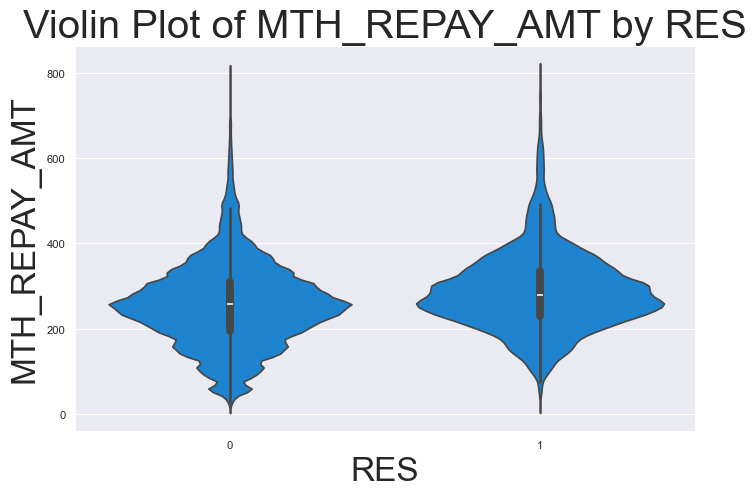

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_violin(df, col, range_low, range_high):
    np.seterr(under='ignore')
    plt.figure(figsize=(8, 5))
    sns.set_style('darkgrid')
    
    # Ensure the column is treated as numeric for filtering
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Create the violin plot
    sns.violinplot(x="RES", y=col, data=df[(df[col] >= range_low) & (df[col] <= range_high)])
    
    # Add titles and labels
    plt.title(f'Violin Plot of {col} by RES')
    plt.xlabel('RES')
    plt.ylabel(col)
    
    # Show the plot
    plt.show()

# Load your dataset
df = pd.read_csv('/Users/wenzhao/Desktop/ds/data_credit.csv', dtype='str')

# Convert 'RES' to string
df['RES'] = df['RES'].astype('str')

# Plot violin plot for the MTH_REPAY_AMT column
plot_violin(df, 'MTH_REPAY_AMT', 0, 800)


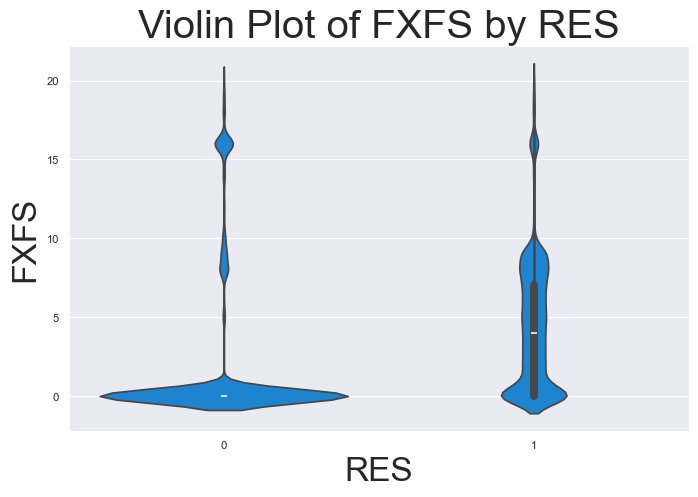

In [34]:
plot_violin(df, 'FXFS', 0, 20)

In [35]:
pd.set_option('display.max_columns',100)
data=pd.read_csv('data_credit.csv',#encoding='gbk',
                 dtype={'CUST_OPEN_ORG':str,'SEX':str,'IS_INSUUANCE':str,
                                                  'REG_PROV':str,'REG_CITY':str,
                                                  'IS_REG_LIVE':str,'LIVE_BUILD_TYPE':str,'LIVE_PROV':str,
                                                  'NATION':str,'UNIT_SCALE':str,'RES':str})
cat_col = ['RES','CUST_OPEN_ORG', 'IS_INSUUANCE', 'SEX', 'REG_PROV', 'REG_CITY',
       'IS_REG_LIVE', 'LIVE_BUILD_TYPE',  'LIVE_PROV',
       'LIVE_CITY', 'MTH_TEL_BILL', 'IS_REAL_NAME',
       'MAR_STATUS', 'IS_REG_ADD', 'INCOME', 'EDUCATION', 'UNIT_TYPE',
        'UNIT_PROV', 'UNIT_CITY', 'UNIT_SCALE', 'STR_PROV',
       'STR_CITY', 'FILE_TYPE', 'CUST_TYPE', 'FAM_REL_CODE',
       'CONTACT_REL_CODE', 'WORK_DEPT_CODE', 'GOODS_TYPE_CODE', 'G01001',
       'G01002', 'G01003', 'G01004', 'G01005', 'G01007', 'G01008', 'G02001',
       'G02002', 'G02003', 'G02004', 'G02005', 'G02006', 'G02007', 'G02010',
       'G02015', 'G02016', 'G02017', 'G03002', 'G03005', 'G03012', 'G04001',
       'G04002', 'G04003', 'G04005', 'G04008', 'G04013', 'G04016', 'MAR_LEVEL',
       'STR_LEVEL', 'IS_GRAY', 'IS_WHITE', 'TDJG', 'FXFS', 'STR_RISK_LEVEL',
       'SA_LEVEL', 'IS_NUM_REPEAT', 'PRO_NAME', 'NATION',  'IS_TQJQ']
num_col = ['TOTAL_PRICE','DOWN_PAY','MTH_REPAY_AMT', 'LOAN_HOUR','AGE','FXFS'
            ,'contno','yqcszb', 'maxodd', 'r2yq', 'maxr2odd', 'wb_cnt']

/var/folders/l8/jlypw82d19xdp77m42qkht8r0000gn/T/ipykernel_22891/3052362828.py:2: DtypeWarning: Columns (21,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('data_credit.csv',#encoding='gbk',


In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in cat_col:
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data[num_col] = data[num_col].replace('MISSING', np.nan)
data[num_col] = data[num_col].astype(float)
for col in num_col:
    mean_value = data[col].median()
    data[col].fillna(mean_value, inplace=True)

/var/folders/l8/jlypw82d19xdp77m42qkht8r0000gn/T/ipykernel_22891/1841349603.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_value, inplace=True)
/var/folders/l8/jlypw82d19xdp77m42qkht8r0000gn/T/ipykernel_22891/1841349603.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [37]:
X = data[cat_col + num_col].drop('RES',axis = 1)
y = data['RES']

indices = np.arange(data.shape[0])
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    X, y, indices, test_size=0.3, random_state=2024)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     45125
           1       0.88      0.64      0.74      9436

    accuracy                           0.92     54561
   macro avg       0.90      0.81      0.85     54561
weighted avg       0.92      0.92      0.92     54561



In [38]:
def lower_sample_data(df, percent):
    '''
    percent:多数类别下采样的数量相对于少数类别样本数量的比例
    '''
    most_data = df[df['RES'] == 0]  
    minority_data = df[df['RES'] == 1] 
    index = np.random.randint(len(most_data), size=int(percent * len(minority_data)) )
    lower_data = most_data.iloc[list(index)]  
    return(pd.concat([lower_data, minority_data]))


df_test, df_train = data.iloc[test_idx], data.iloc[train_idx]


data2=lower_sample_data(df_train, 2)

X = data2[cat_col + num_col].drop('RES',axis = 1)
y = data2['RES']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=32)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)
print(classification_report(y_val, y_val_pred))
y_test_pred = rf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4395
           1       0.90      0.76      0.82      2159

    accuracy                           0.89      6554
   macro avg       0.90      0.86      0.87      6554
weighted avg       0.89      0.89      0.89      6554

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     45125
           1       0.72      0.76      0.74      9436

    accuracy                           0.91     54561
   macro avg       0.83      0.85      0.84     54561
weighted avg       0.91      0.91      0.91     54561

